In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['salary_grid.csv', 'recruiting_costs.csv', 'HRDataset_v9.csv', 'production_staff.csv', 'core_dataset.csv']


In [2]:
import matplotlib.pyplot as pt

In [5]:
hr = pd.read_csv("../input/core_dataset.csv")

In [6]:
hr.columns = ['Name','EmpNum','State','Zip','Date_of_birth','Age','Sex','MaritalDesc','CitizenDesc','Hispanic/Latino','RaceDesc','Date_of_Hire','Date_of_Termination','Reason_For_Termination','Employment_Status','Department','Position','Pay_Rate','Manager_Name','Employment_Source','Performance_Score']

In [7]:
print(hr)

                      Name            ...                    Performance_Score
0               Brown, Mia            ...                          Fully Meets
1     LaRotonda, William              ...                          Fully Meets
2         Steans, Tyrone              ...                          Fully Meets
3          Howard, Estelle            ...             N/A- too early to review
4              Singh, Nan             ...             N/A- too early to review
5         Smith, Leigh Ann            ...                          Fully Meets
6      LeBlanc, Brandon  R            ...                          Fully Meets
7              Quinn, Sean            ...                          Fully Meets
8        Boutwell, Bonalyn            ...                         90-day meets
9        Foster-Baker, Amy            ...                          Fully Meets
10             King, Janet            ...                          Fully Meets
11        Zamora, Jennifer            ...           

In [8]:
hr = hr.drop(hr.index[301])

In [9]:
print(hr.columns)

Index(['Name', 'EmpNum', 'State', 'Zip', 'Date_of_birth', 'Age', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc',
       'Date_of_Hire', 'Date_of_Termination', 'Reason_For_Termination',
       'Employment_Status', 'Department', 'Position', 'Pay_Rate',
       'Manager_Name', 'Employment_Source', 'Performance_Score'],
      dtype='object')


In [11]:
hr_no_dot = hr.drop('Date_of_Termination',axis=1)

In [12]:
PerformanceScore_dict = {'N/A- too early to review': 3,
                        'Needs Improvement': 2,
                        'Fully Meets': 3,
                        '90-day meets': 3,
                        'Exceeds': 4,
                        'Exceptional': 5,
                        'PIP': 1}
hr_no_dot['Performance_Score_Num'] = hr_no_dot['Performance_Score'].replace(PerformanceScore_dict)
print(hr_no_dot)

                      Name          ...            Performance_Score_Num
0               Brown, Mia          ...                                3
1     LaRotonda, William            ...                                3
2         Steans, Tyrone            ...                                3
3          Howard, Estelle          ...                                3
4              Singh, Nan           ...                                3
5         Smith, Leigh Ann          ...                                3
6      LeBlanc, Brandon  R          ...                                3
7              Quinn, Sean          ...                                3
8        Boutwell, Bonalyn          ...                                3
9        Foster-Baker, Amy          ...                                3
10             King, Janet          ...                                3
11        Zamora, Jennifer          ...                                5
12           Becker, Renee          ...            

In [13]:
perf_race = hr_no_dot.set_index(['RaceDesc']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['RaceDesc']).mean()
print(perf_race)
perf_race1 = perf_race.reset_index()
print(perf_race1)

                                  Performance_Score_Num
RaceDesc                                               
American Indian or Alaska Native               3.500000
Asian                                          3.064516
Black or African American                      2.981481
Hispanic                                       2.750000
Two or more races                              3.000000
White                                          3.057895
                           RaceDesc  Performance_Score_Num
0  American Indian or Alaska Native               3.500000
1                             Asian               3.064516
2         Black or African American               2.981481
3                          Hispanic               2.750000
4                 Two or more races               3.000000
5                             White               3.057895


Employee race-wise performance visualization

<BarContainer object of 6 artists>

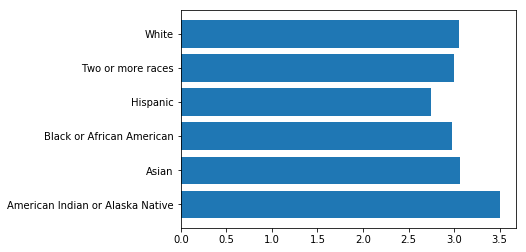

In [15]:
x = perf_race1['Performance_Score_Num']
y = perf_race1['RaceDesc']
pt.figure
pt.barh(y,x)

In [16]:
perf_empl_src = hr_no_dot.set_index(['Employment_Source']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['Employment_Source']).mean()
print(perf_empl_src)
perf_empl_src1 = perf_empl_src.reset_index()
print(perf_empl_src1)

                                        Performance_Score_Num
Employment_Source                                            
Billboard                                            3.000000
Careerbuilder                                        3.000000
Company Intranet - Partner                           3.000000
Diversity Job Fair                                   3.068966
Employee Referral                                    3.258065
Glassdoor                                            3.000000
Information Session                                  3.250000
Internet Search                                      2.833333
MBTA ads                                             3.176471
Monster.com                                          2.958333
Newspager/Magazine                                   3.000000
On-campus Recruiting                                 3.083333
On-line Web application                              3.000000
Other                                                3.111111
Pay Per 

Employment source-wise performance visualization

<BarContainer object of 22 artists>

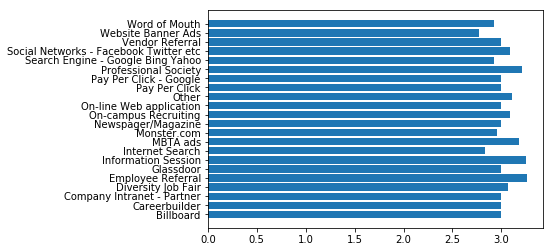

In [17]:
x = perf_empl_src1['Performance_Score_Num']
y = perf_empl_src1['Employment_Source']
pt.figure
pt.barh(y,x)

In [18]:
perf_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Age','Pay_Rate'],axis=1).groupby(['Department']).mean()
print(perf_dept)
perf_dept1 = perf_dept.reset_index()
print(perf_dept1)

                           Performance_Score_Num
Department                                      
Admin Offices                           3.000000
Executive Office                        3.000000
IT/IS                                   3.219512
Production                              3.028846
Sales                                   2.870968
Software Engineering                    3.222222
Software Engineering                    3.000000
                  Department  Performance_Score_Num
0              Admin Offices               3.000000
1           Executive Office               3.000000
2                      IT/IS               3.219512
3          Production                      3.028846
4                      Sales               2.870968
5       Software Engineering               3.222222
6  Software Engineering                    3.000000


Department-wise performance visualization

<BarContainer object of 7 artists>

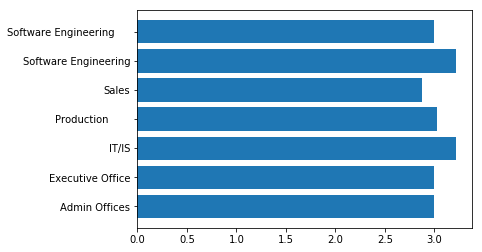

In [19]:
x = perf_dept1['Performance_Score_Num']
y = perf_dept1['Department']
pt.figure
pt.barh(y,x)

In [20]:
pay_race = hr_no_dot.set_index(['RaceDesc']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['RaceDesc']).mean()
print(pay_race)
pay_race1 = pay_race.reset_index()
print(pay_race1)

                                   Pay_Rate
RaceDesc                                   
American Indian or Alaska Native  30.375000
Asian                             29.440645
Black or African American         34.624630
Hispanic                          39.750000
Two or more races                 31.264444
White                             29.577053
                           RaceDesc   Pay_Rate
0  American Indian or Alaska Native  30.375000
1                             Asian  29.440645
2         Black or African American  34.624630
3                          Hispanic  39.750000
4                 Two or more races  31.264444
5                             White  29.577053


Race-wise pay rate visualization

<BarContainer object of 6 artists>

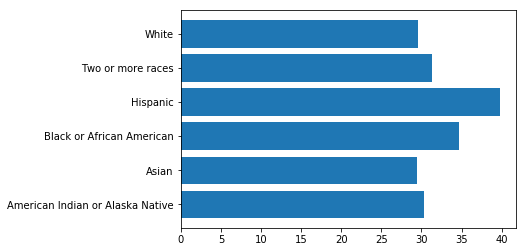

In [21]:
x = pay_race1['Pay_Rate']
y = pay_race1['RaceDesc']
pt.figure
pt.barh(y,x)

In [23]:
pay_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['Department']).mean()
print(pay_dept)
pay_dept1 = pay_dept.reset_index()
print(pay_dept1)

                            Pay_Rate
Department                          
Admin Offices              31.896000
Executive Office           80.000000
IT/IS                      44.792195
Production                 23.086298
Sales                      55.524194
Software Engineering       51.072222
Software Engineering       27.000000
                  Department   Pay_Rate
0              Admin Offices  31.896000
1           Executive Office  80.000000
2                      IT/IS  44.792195
3          Production         23.086298
4                      Sales  55.524194
5       Software Engineering  51.072222
6  Software Engineering       27.000000


Department-wise pay rate visualization

<BarContainer object of 7 artists>

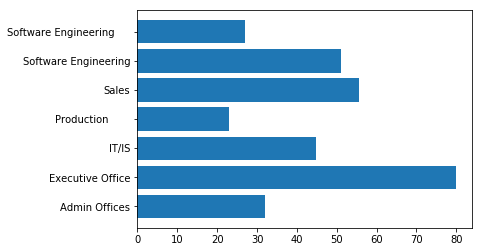

In [24]:
x = pay_dept1['Pay_Rate']
y = pay_dept1['Department']
pt.figure
pt.barh(y,x)

In [25]:
pay_pos = hr_no_dot.set_index(['Position']).drop(['EmpNum','Zip','Age','Performance_Score_Num'],axis=1).groupby(['Position']).mean()
print(pay_pos)
pay_pos1 = pay_pos.reset_index()
print(pay_pos1)

                               Pay_Rate
Position                               
Accountant I                  26.833333
Administrative Assistant      19.520000
Area Sales Manager            55.222222
CIO                           65.000000
Database Administrator        39.476923
Director of Operations        60.000000
Director of Sales             60.000000
IT Director                   65.000000
IT Manager - DB               41.500000
IT Manager - Infra            63.000000
IT Manager - Support          64.000000
IT Support                    28.470000
Network Engineer              39.677778
President & CEO               80.000000
Production Manager            49.678571
Production Technician I       19.104485
Production Technician II      25.407719
Sales Manager                 56.750000
Shared Services Manager       55.000000
Software Engineer             51.072222
Software Engineering Manager  27.000000
Sr. Accountant                34.950000
Sr. DBA                       60.000000


Position-wise pay rate visualization

<BarContainer object of 24 artists>

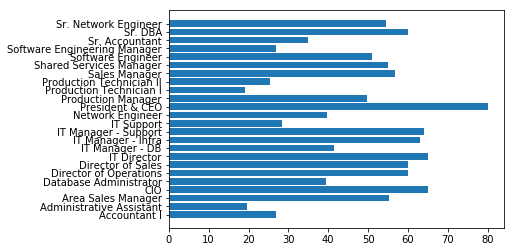

In [26]:
x = pay_pos1['Pay_Rate']
y = pay_pos1['Position']
pt.figure
pt.barh(y,x)

In [27]:
age_dept = hr_no_dot.set_index(['Department']).drop(['EmpNum','Zip','Pay_Rate','Performance_Score_Num'],axis=1).groupby(['Department']).mean()
print(age_dept)
age_dept1 = age_dept.reset_index()
print(age_dept1)

                                 Age
Department                          
Admin Offices              32.100000
Executive Office           63.000000
IT/IS                      37.804878
Production                 39.024038
Sales                      38.645161
Software Engineering       33.666667
Software Engineering       51.000000
                  Department        Age
0              Admin Offices  32.100000
1           Executive Office  63.000000
2                      IT/IS  37.804878
3          Production         39.024038
4                      Sales  38.645161
5       Software Engineering  33.666667
6  Software Engineering       51.000000


Department-wise age visualization

<BarContainer object of 7 artists>

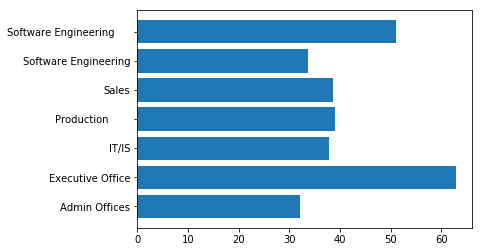

In [28]:
x = age_dept1['Age']
y = age_dept1['Department']
pt.figure
pt.barh(y,x)